# TMDB -- The Movie Database

<b> Dataset </b> <br>
26 million ratings . 270,000 users . 45,000 movies

<b>Pipeline</b> <br>
Import Libraries

<b> Reference used for copy and study:</b> <br>
Dataset: https://www.kaggle.com/rounakbanik/the-movies-dataset <br>
EDA: https://www.kaggle.com/rounakbanik/the-story-of-film/ <br>
Recommendation System: https://www.kaggle.com/rounakbanik/movie-recommender-systems


# Import Libraries

In [36]:
from IPython.display import Image, HTML
import json
import datetime
import ast

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor

from wordcloud import WordCloud, STOPWORDS

import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import chart_studio
chart_studio.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

# 1--Data Observation

FEATURES

* adult: X-Rated or Adult 
* belongs_to_collection: Breakdown information on movie series
* budget: Budget in USD$
* genres: Genres 
* homepage: The official Homepage 
* id: id 
* imdb_id: IMDB ID 
* original_language: Language which the movie was originally shot in
* original_title: Original title of the movie 
* overview: Brief summary of movie
* popularity: TMDB popularity score 
* poster_path: Poster link 
* production_companies: Production companies 
* release_date: Theatrical Release Date 
* revenue: Total revenue in USD$ 
* runtime: Total runtime in minutes 
* spoken_languages: Spoken languages 
* status: Status such as Released, To Be Released, Announced, etc 
* tagline: Tagline 
* title: The official title 
* video: Indicates if there is a video present of the movie with TMDB
* vote_average: The average rating of the movie 
* vote_count: The number of votes by uses, counted by TMDB 

In [37]:
tmdb = pd.read_csv("/Users/wonghuiee/AI_DataScience/Xccelerate/04MLApplications/TMDB/Dataset/movies_metadata.csv")
tmdb.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


There are 45,466 movies with 24 features. Most features have very few NaN values except homepage and tagline. 

In [38]:
tmdb.shape

(45466, 24)

In [39]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# 2--Data Wrangling

* drop **imdb_id** 
* drop **original_title**
* drop **adult**
* **revenue** replace 0 to np.nan
* **budget** replace non-numeric to np.nan
* construct feature **year** : The year in which movie is released
* construct feature **return** : The ratio of revenue to budget

In [40]:
# drop "imdb_id"
tmdb = tmdb.drop(["imdb_id"], axis=1)

In [41]:
# drop "original_title"
# We will be able to deduce if the movie is a foreign language file by looking at "original_language"
tmdb[tmdb[ "original_title"] != tmdb["title"] ][ ["title", "original_title"]].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [42]:
# drop "original_title"
tmdb = tmdb.drop("original_title", axis = 1)

In [43]:
# drop "adult"
# there are close to 0 adult movies. The adult feature is not much use and can be safely dropped
tmdb["adult"].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [44]:
# drop "adult"
tmdb = tmdb.drop("adult", axis=1)

In [45]:
# majority of revenue is 0
tmdb[tmdb["revenue"]==0].shape

(38052, 21)

In [46]:
# "revenue" replace 0 to np.nan
tmdb["revenue"] = tmdb["revenue"].replace(0, np.nan)

In [47]:
# "budget" replace non-numeric to np.nan
tmdb["budget"] = pd.to_numeric(tmdb["budget"], errors="coerce")
tmdb["budget"] = tmdb["budget"].replace(0, np.nan)
tmdb[tmdb["budget"].isnull()].shape

(36576, 21)

**year** : The year in which the movie was released

In [48]:
tmdb["year"] = pd.to_datetime(tmdb["release_date"], errors="coerce").apply(
    lambda x:str(x).split("-")[0] if x!=np.nan else np.nan)

**return** : The ratio of revenue to budget<br>
**return** gives us an accurate picture of the financial success of the movie. As of current, our data will not be able to judge if a $200mil budget movie that earned $100mil did better than $50,000 budget movie earned $200,000. This feature will capture the information

return value > 1 indicate profit <br>
return value < 1 indicate loss

We have close to **5000 movies** which we have data on revenue and budget ratio. This is close to **10% of the entire dataset**. Although this may seem small, this is enough to perform very useful analysis and discover interesting insights.

In [49]:
tmdb["return"] = tmdb["revenue"] / tmdb["budget"]
tmdb[tmdb["return"].isnull()].shape

(40085, 23)

In [50]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
tmdb['poster_path'] = "<img src='" + base_poster_url + tmdb['poster_path'] + "' style='height:100px;'>"

# 3--EDA

* Title and Overview Wordcloud
* Franchise Movies
* Production Countries
* Production Companies

### Title and Overview Worldcloud

Are there certain words that figure more often in Movie Titles and Movie Blurbs ?

The word **Love** is the most commonly used in movie titles. **Girl, Day,** and **Man** are also among the most commonly occuring words. This encapsulates the idea of ubiquitious presence of romance in movies

The word **Life** is the most commonly used in movie blurbs. **One** and **Find** are also popular are also among the most commonly occuring words. These gives us a good idea of the most popular themes present in movies.

In [51]:
tmdb["title"] = tmdb["title"].astype("str")
tmdb["overview"] = tmdb["overview"].astype("str")

In [52]:
titleCorpus = " ".join(tmdb["title"])
overviewCorpus = " ".join(tmdb["overview"])

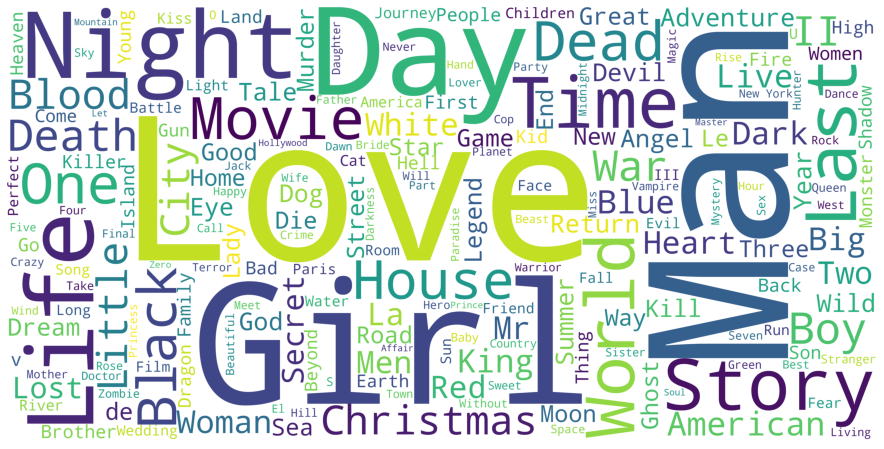

In [53]:
titleWordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", height=2000, width=4000).generate(titleCorpus)
plt.figure(figsize=(16,8))
plt.imshow(titleWordcloud)
plt.axis("off")
plt.show()

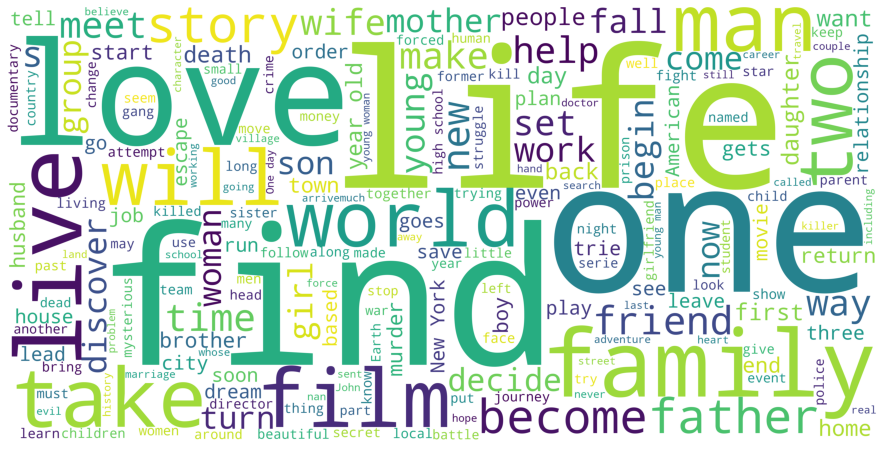

In [54]:
overviewWordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", height=2000, width=4000).generate(overviewCorpus)
plt.figure(figsize=(16,8))
plt.imshow(overviewWordcloud)
plt.axis("off")
plt.show()

### Franchise Movies

Let us have a brief look at Franchise Movies. I was curious to discover the longest running and the most successful franchises among many other things.

In [55]:
franDF = tmdb[tmdb["belongs_to_collection"].notnull()]
franDF["belongs_to_collection"] = franDF["belongs_to_collection"].apply(ast.literal_eval).apply(lambda x:x["name"] if isinstance(x, dict) else np.nan)
franDF = franDF[franDF["belongs_to_collection"].notnull()]

In [56]:
franPivot = franDF.pivot_table(index="belongs_to_collection", values="revenue", aggfunc={"revenue": ["mean", "sum", "count"]}).reset_index()

**Highest Gross**. The **Harry Potter** Franchise is the most successful movie franchise raking in more than 7.7 billion dollars from 8 movies. The **Star Wars** Movies come in close second with a 7.4 billion dollars from 8 movies too. **James Bond** is third but the franchise has significantly more movies compared to others in the list, therefore much smaller average gross.

In [57]:
# Highest grossing movie franchises
franPivot.sort_values("sum", ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


**Highest by Average Gross**. The **Avatar** Collection, although just consisting of one movie at the moment, is the most successful franchise of all time with the sole movie raking in close to 3 billion dollars. The **Harry Porter** franchise is still the most successful franchise with at least 5 movies

We will use the average gross per movie to gauge the sucess of a movie franchise. However, this is not a very potent metric as the revenues in this dataset have not been adjusted for inflation. Therefore, revenue statistics will tend to strongly favor franchises in the recent times.

In [58]:
# Most Successful movie franchise (by average gross)
franPivot.sort_values("mean", ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


**Longest Running Franchises**. Let's look at the franchises which have stood the test of time and have managed to deliver the largest number of movies under a single banner. This metric is potent in the way that it isnt affected by inflation. However, this does not imply that successful movie franchises tend to have more movies. Some franchises, such as Harry Potter, have a predefined storyline and it wouldn't make sense to produce more movies despite its enormous success

The **James Bond** Movies is the largest franchise over 26 movies released under the banner. **Friday the 13th** and **Pokemon** come in at a distant second and third with 12 and 11 movies respectively

In [59]:
franPivot.sort_values("count", ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


### Production Countries

The Full MovieLens Dataset consists of movies that are overwhelmingly in English language (more than 31000). However, these movies may have shot in various locations around the world. It would be interesting to see which countries serve as the most popular destinations for shooting movies by filmakers, especially those in the USA and UK.

Unsurprisingly, the **United States** is the most popular destination of production for movies given that our dataset largely consists of English movies. **Europe** is also an extremely popular location with the UK, France, Germany and Italy in the top 5. **Japan** and **India** are the most popular Asian countries when it comes to movie production

In [60]:
tmdb["production_countries"] = tmdb["production_countries"].fillna("[]").apply(ast.literal_eval)
tmdb["production_countries"] = tmdb["production_countries"].apply(lambda x:[i["name"] for i in x] if isinstance(x, list) else [])

In [61]:
con = tmdb.apply(lambda x: pd.Series(x["production_countries"]), axis=1).stack().reset_index(level=1, drop=True)
con.name = "countries"

In [62]:
conDF = tmdb.drop('production_countries', axis=1).join(con)
conDF = pd.DataFrame(conDF['countries'].value_counts())
conDF['country'] = conDF.index
conDF.columns = ['num_movies', 'country']
conDF = conDF.reset_index().drop('index', axis=1)
conDF.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [63]:
conDF = conDF[conDF["country"] != "United States of America"]

In [64]:
data = [ dict(
        type = 'choropleth',
        locations = conDF['country'],
        locationmode = 'country names',
        z = conDF['num_movies'],
        text = conDF['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )